## Data analysis on covid cases evolving in Uruguay

The data for this analysis comes from the [Our World In Data](https://github.com/owid/covid-19-data) GitHub repository, which is updated daily.

#### Importing necessary packages

In [1]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading data from the source

In [2]:
# Reading data and storing in pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
print('dataframe has: {} rows'.format(df.shape[0]))

dataframe has: 190655 rows


#### Extracting a subset of data

In [3]:
# Selecting a subset of data corresponding to the location Uruguay
uy = df[df["location"] == "Uruguay"]
# Printing first 5 rows
uy.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
182946,URY,South America,Uruguay,2022-05-27,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182947,URY,South America,Uruguay,2022-05-28,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182948,URY,South America,Uruguay,2022-05-29,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182949,URY,South America,Uruguay,2022-05-30,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182950,URY,South America,Uruguay,2022-05-31,925777.0,9389.0,1341.286,7238.0,11.0,1.571,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN


In [4]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy.shape[0]))

dataframe has: 810 rows


##### Displaying the last records that were updated in the database

In [5]:
# Display
uy.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
182946,URY,South America,Uruguay,2022-05-27,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182947,URY,South America,Uruguay,2022-05-28,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182948,URY,South America,Uruguay,2022-05-29,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182949,URY,South America,Uruguay,2022-05-30,916388.0,0.0,1187.143,7227.0,0.0,1.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
182950,URY,South America,Uruguay,2022-05-31,925777.0,9389.0,1341.286,7238.0,11.0,1.571,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN


#### Creating separate columns for day, month and year

In [6]:
# Creating separate columns for day, month and year
uy['year'] = pd.DatetimeIndex(uy['date']).year
uy['month'] = pd.DatetimeIndex(uy['date']).month
uy['month'] = uy['month'].apply(lambda x: calendar.month_abbr[x])
uy['day'] = pd.DatetimeIndex(uy['date']).day

#Selecting data for 2021 year only
#uy21 = uy[uy["year"] == 2021]
uy22 = uy[uy["year"] == 2022]

<ipython-input-6-21cee4d0130f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['year'] = pd.DatetimeIndex(uy['date']).year
<ipython-input-6-21cee4d0130f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['month'] = pd.DatetimeIndex(uy['date']).month
<ipython-input-6-21cee4d0130f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [7]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy22.shape[0]))

dataframe has: 151 rows


#### Visualizing the data for the cases that occurred in Uruguay

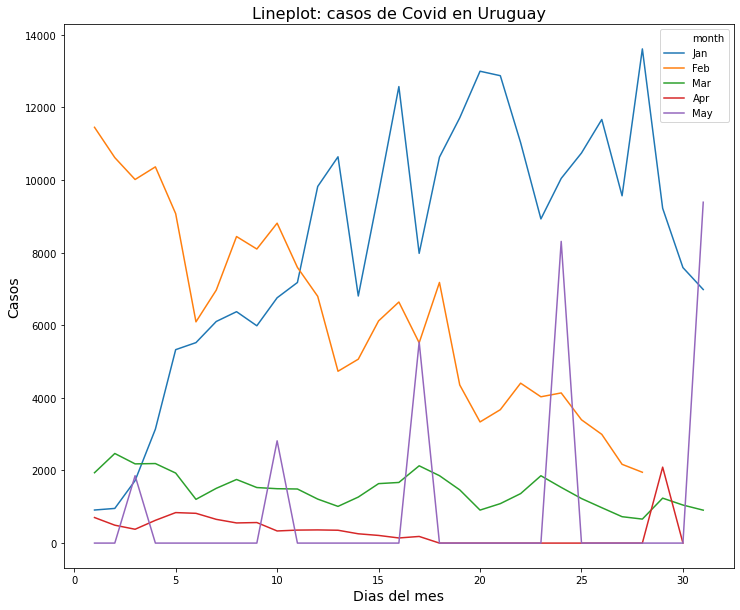

In [8]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=0)
sns.lineplot(x="day",
            y="new_cases",
            hue="month",
            data=uy22)
plt.ylabel("Casos", size=14)
plt.xlabel("Dias del mes", size=14)
plt.title("Lineplot: casos de Covid en Uruguay", size=16)

# Utilizando la funcion plt.show() se logra visualizar la grafica
plt.show()